# Comprehensive Modeling Analysis: Predicting Airbnb New User Bookings

<br>

Home rental services such as Airbnb allow people to find affordable temporary housing on short notice. The efficiency of these services can be increased by making decisions informed by knowledge about how future customers will use them. By being able to determine how new customers will use home rental services for the first time, proactive changes can be made to the service and the surrounding operations. This results in a better product for the customers and improved operations for stakeholders. Data science techniques allow for the prediction of future user activities at the cost of relatively few resources. The abundance of data generated by short-term home rental services such as Airbnb, allows for plenty of opportunities for data science to be used to improve the operations. In order to utilize this readily usable data, I am interested in predicting booking destinations of first time Airbnb users.

Airbnb’s platform allows customers to efficiently find homes that fit their needs through the use of features such as filtered searches and wishlists. After finding desirable lodging, customers input payment information and book the locations. Throughout this process data is generated through information provided by the users and details saved about the user’s web sessions.

Several types of classification models were used to predict the first booking destination countries of Airbnb users. Models focused on using demographic and web session data to assign booking destination countries to individual users. The different models were compared by their ability to accurately and efficiently predict booking country. A final model was chosen from those that were evaluated and deemed suitable to be scaled for production. The process used to build this product is as follows:

<br>

Initiation and Data Preprocessing
* Import Packages and Files
* Data Cleaning
* Feature Engineering

Data Analysis and Exploration
* Viewing the Distribution of the Different Classes
* Checking the Correlatedness of Different Variables
* Interpreting Descriptive Statistics

Preparing The Data For Modeling
* Class Balancing and Mathematical Transformations
* Feature Selection and Reduction
* Establishing Variables for Training and Testing

Supervised Learning Models
1. Using Unaltered Features
2. Using Features Selected using F Values
3. Using Features Selected using Chi Squared
4. Using Recurrent Neural Network
5. Using Features Selected using Random Forests

Analysis and Conclusion
* Final Model Selection and Analysis
* Conclusion and Discussion

<br>

The purpose of this study is to: analyze user demographics and behavioral patterns via data visualization, identify key indicators of future behavior by utilizing statistical inference and machine learning algorithms, create a machine learning model that can predict the booking destination of users that haven't made a booking yet, and use the aforementioned model to predict the future behavior of users that are currently on the platform.


## Initiation and Data Preprocessing

The data used for this model was released by Airbnb in the following datasets: train_users.csv and sessions.csv. The train user dataset contains information about specific users and how they first accessed the service. This dataset has over 200000 records with each one containing information about a unique user. The train user dataset contains the outcome variable, country destination. The sessions dataset contains information about actions performed during the user’s time on the Airbnb platform. This dataset contains over 10 million records with each one reflecting a specific action performed on the platform. Multiple records on the sessions dataset can refer a single user’s actions. A dataframe was created for modeling containing features generated from both datasets.

In [1]:
%%time

import math
from scipy import stats
import numpy as np
import pandas as pd
import re
import warnings


from IPython.display import display
from matplotlib import pyplot as plt

import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
from sklearn.utils import resample
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_squared_error



import keras
from keras.models import Model
from keras.layers import Input, Dense, TimeDistributed
from keras.layers import LSTM
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D, MaxPool1D, MaxPooling1D
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras import backend as K
from keras.layers.embeddings import Embedding

from datetime import datetime
from dateutil.parser import parse


# Display Preferences
pd.options.display.float_format = '{:.3f}'.format

# Suppress Warnings
warnings.filterwarnings(action="ignore")


# Set Plot Style
sns.set_style('darkgrid')
sns.color_palette("Paired")

%matplotlib inline

CPU times: user 2.58 s, sys: 860 ms, total: 3.44 s
Wall time: 4.86 s


In [2]:
%%time

## Import Files

df_train = pd.read_csv('train_users_2.csv')
df_sessions = pd.read_csv('sessions.csv')

## Create DataFrame for Modeling and Analysis

df = df_train


CPU times: user 8.04 s, sys: 956 ms, total: 9 s
Wall time: 9.21 s


In [3]:
## View Data for Cleaning

#df.head(7)
#df.dtypes
#df.info()
#df.describe()
#df.iloc[:,0].nunique()
#df.isnull().sum(axis = 0)
#len(df)


In [4]:
%%time

## Data Cleaning

# Converting Unknown Gender to Null
df['gender'] = df['gender'].map({'-unknown-': np.nan, 'FEMALE':'female', 'MALE':'male'})

# Convert Extreme Ages to Null
df[df.age < 15] = df[df.age < 15].assign(age=np.nan)
df[df.age > 150] = df[df.age > 150].assign(age=np.nan) 
 

CPU times: user 120 ms, sys: 5.31 ms, total: 126 ms
Wall time: 128 ms


In [5]:
%%time

## Parse Columns to DateTime Format

df['date_account_created'] = df['date_account_created'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='coerce'))
df['timestamp_first_active'] = df['timestamp_first_active'].apply(lambda x: pd.to_datetime(x, format='%Y%m%d%H%M%S', errors='coerce'))
df['date_first_booking'] = df['date_first_booking'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='coerce'))

## Creating Features based on DateTime Columns

df['year_account_created'] = df['date_account_created'].apply(lambda x: x.year)
df['month_account_created'] = df['date_account_created'].apply(lambda x: x.month)
df['day_account_created'] = df['date_account_created'].apply(lambda x: x.day)
df['day_of_year_account_created'] = df['date_account_created'].apply(lambda x: x.dayofyear)
df['timestamp_account_created'] = df['date_account_created'].apply(lambda x: x.timestamp())

df['year_first_active'] = df['timestamp_first_active'].apply(lambda x: x.year)
df['month_first_active'] = df['timestamp_first_active'].apply(lambda x: x.month)
df['day_first_active'] = df['timestamp_first_active'].apply(lambda x: x.day)
df['hour_first_active'] = df['timestamp_first_active'].apply(lambda x: x.hour)
df['first_active_timestamp'] = df['timestamp_first_active'].apply(lambda x: x.timestamp())

df['year_first_booking'] = df['date_first_booking'].apply(lambda x: x.year)
df['month_first_booking'] = df['date_first_booking'].apply(lambda x: x.month)
df['day_first_booking'] = df['date_first_booking'].apply(lambda x: x.day)
df['hour_first_booking'] = df['date_first_booking'].apply(lambda x: x.hour)


CPU times: user 1min 46s, sys: 1.55 s, total: 1min 47s
Wall time: 1min 50s


In [6]:
%%time

## Creating Features based on Sessions DataFrame

df_sessions['action_detail_count'] = df_sessions.groupby([
    'user_id','action_detail'])['action_detail'].transform('count')

# Total Amount of Time Spent on Platform
df_session_length = pd.DataFrame(df_sessions.groupby(['user_id'])['secs_elapsed'].sum())
df_session_features = df_session_length

# Counts of Specific Action Details
num_classes = 20
action_detail_count_classes = list(df_sessions['action_detail'].value_counts().index)[:num_classes]

for value in action_detail_count_classes:
    column = df_sessions.loc[df_sessions['action_detail'] == value][['user_id','action_detail_count']].drop_duplicates().rename(columns={'action_detail_count': value +'_count'})
    df_session_features = pd.merge(df_session_features, column, left_on='user_id', right_on='user_id', how='left').fillna(value=0)
    
# Time Spent on Specific Action Details
num_classes = 20
action_detail_time_classes = list(df_sessions['action_detail'].value_counts().index)[:num_classes]

for value in action_detail_time_classes:
    column = pd.DataFrame(df_sessions.loc[df_sessions['action_detail'] == value].groupby(['user_id'])['secs_elapsed'].sum()).rename(columns = {"secs_elapsed" : value+'_secs'})
    df_session_features = pd.merge(df_session_features, column, left_on='user_id', right_on='user_id', how='left').fillna(value=0)


CPU times: user 40.2 s, sys: 3.62 s, total: 43.9 s
Wall time: 44.4 s


In [7]:
%%time

## Drop -Unknown- features

df_session_features = df_session_features.drop(['-unknown-_count','-unknown-_secs'],1)

## Save Session Feature Names

session_feature_names = list(df_session_features.columns[df_session_features.columns != 'user_id'])

## Merge Session Features with Training DataFrame

df = pd.merge(df, df_session_features, left_on='id', right_on='user_id', how='left').drop(['user_id'],1)

CPU times: user 532 ms, sys: 245 ms, total: 777 ms
Wall time: 787 ms


## Data Exploration and Analysis

The Airbnb data contains information about activity on the platform that occurred between January 2010 and June 2014.  The train dataset originally contained columns related to the time specific activities first occured, information about the how the user accessed Airbnb, and demographics of the users. Additional features were engineered to include the amount of time users spent doing specific activities on the platform.

In [8]:
%%time

## First Several Rows Of Original Train Dataset

df.dropna().iloc[:,0:16].head(7)

CPU times: user 138 ms, sys: 14.7 ms, total: 152 ms
Wall time: 153 ms


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
137021,d1mm9tcy42,2014-01-01,2014-01-01 00:09:36,2014-01-04,male,62.000,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other
137027,xwxei6hdk4,2014-01-01,2014-01-01 00:27:42,2014-01-07,female,32.000,facebook,0,en,seo,google,linked,Web,iPad,Mobile Safari,US
137032,awiurksqr3,2014-01-01,2014-01-01 01:01:13,2014-01-02,female,32.000,facebook,0,en,direct,direct,untracked,Web,iPad,Mobile Safari,US
137036,jrqykh9y8x,2014-01-01,2014-01-01 01:19:19,2014-04-19,female,27.000,facebook,0,zh,seo,google,linked,Web,Mac Desktop,Chrome,FR
137037,s9xrwtyzsq,2014-01-01,2014-01-01 01:23:45,2014-01-02,male,30.000,basic,0,en,sem-brand,google,omg,Web,iPad,Mobile Safari,US
137048,oa8oz6sj6s,2014-01-01,2014-01-01 02:38:48,2014-02-26,male,40.000,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,US
137056,9v9pjiw5s1,2014-01-01,2014-01-01 03:53:58,2014-01-01,male,25.000,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,US


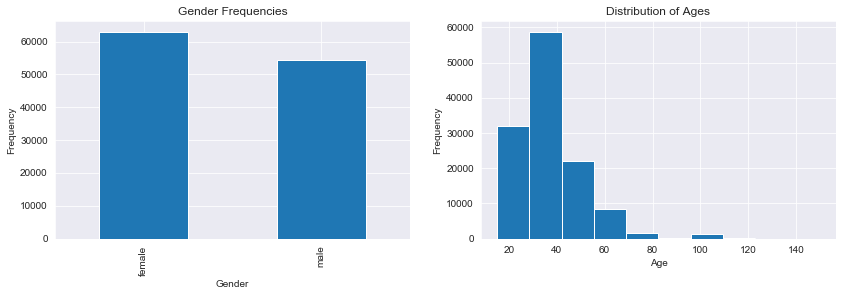

CPU times: user 500 ms, sys: 40.1 ms, total: 540 ms
Wall time: 580 ms


In [9]:
%%time

## Graphing Gender and Age Frequencies

fig = plt.figure(figsize=(14, 4))
fig.subplots_adjust(hspace=.5)

# Bar Graph of Genders
plt.subplot(1, 2, 1)
ax = df.gender.value_counts().plot(kind='bar',  title="Gender Frequencies")
ax.set_xlabel("Gender")
ax.set_ylabel("Frequency")

# Histogram of Ages
plt.subplot(1, 2, 2)
ax = df.age.plot(kind='hist',   title="Distribution of Ages")
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")


plt.show()

Above are plots representing the gender frequencies and age frequencies of the data, respectively. There are more females than males included in the data but the disparity between the two groups is not strong. The distribution of the ages is centered around the 30’s and skewed to the right. This likely reflects an age demographic with both the energy and resources to travel. Since both of these variables contain a large amount of null values imputation will be needed to make use of this data prior to modeling.

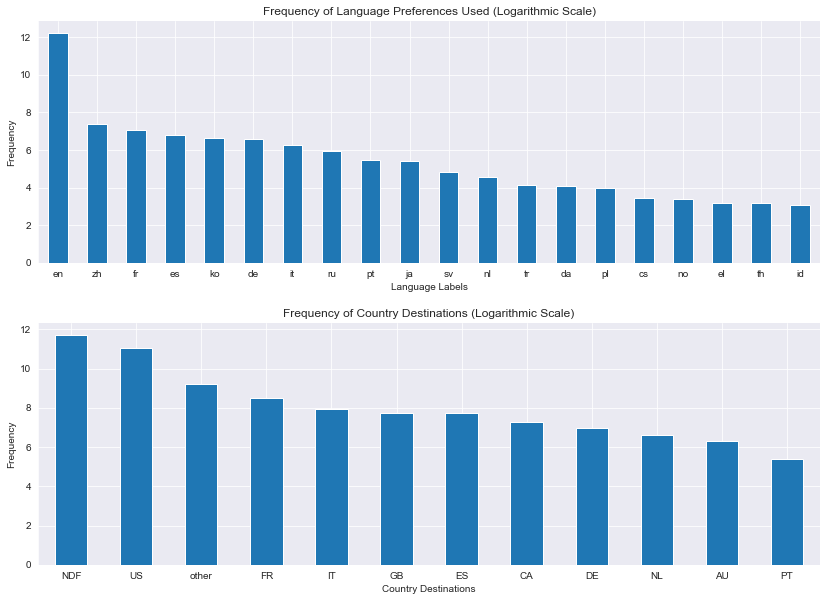

CPU times: user 625 ms, sys: 18.1 ms, total: 643 ms
Wall time: 650 ms


In [10]:
%%time

## Graphing  Language and Country Destination Frequencies (Logarithmic Scale is Used for Readability)

# Language Preferences Used (Logarithmic Scale)
fig = plt.figure(figsize=(14, 10))
fig.subplots_adjust(hspace=.25)

plt.subplot(2, 1, 1)
ax = df.language.value_counts().apply(math.log).head(20).plot(kind='bar',
                                    
                                    title="Frequency of Language Preferences Used (Logarithmic Scale)")
ax.set_xlabel("Language Labels")
ax.set_ylabel("Frequency")
plt.xticks(rotation=0)
sns.despine()

# Country Destinations (Logarithmic Scale)
plt.subplot(2, 1, 2)
ax = df.country_destination.value_counts().apply(math.log).plot(kind='bar',
                                    
                                    title="Frequency of Country Destinations (Logarithmic Scale)")
ax.set_xlabel("Country Destinations")
ax.set_ylabel("Frequency")
plt.xticks(rotation=0)
sns.despine()
plt.show()


Above are plots of languages used on the platform and country destination, respectively. Both plots are scaled logarithmically for readability because the dominant classes far outnumbered the rest. With regard to the language counts, English outnumbered the other classes greatly; and with regard to the country destinations, ‘NDF’ and the US outnumbered the other classes. NDF represents the class of users that haven’t booked a destination yet. Since this would be the class that the model being built would be predicting, this was not be used as an outcome variable to train the model.

In [11]:
%%time

## Signup Method Frequencies Within DataFrame

df.signup_method.value_counts()

CPU times: user 22.3 ms, sys: 691 µs, total: 23 ms
Wall time: 22.8 ms


basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64

The vast majority of users signed onto Airbnb through the platform itsself.

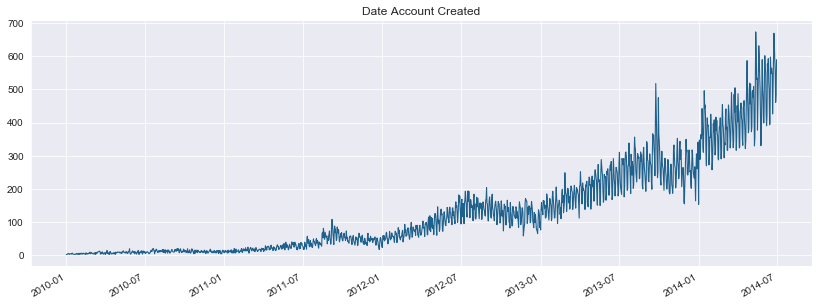

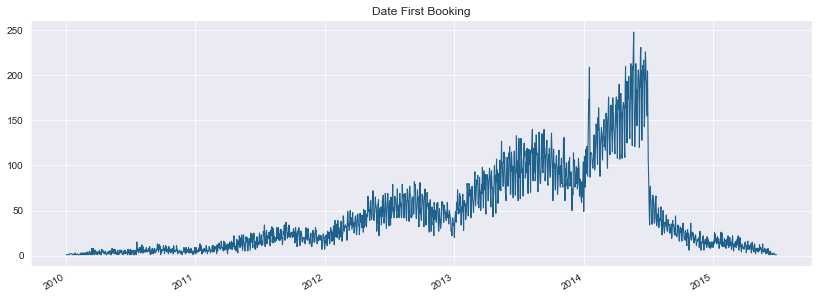

CPU times: user 827 ms, sys: 20.9 ms, total: 848 ms
Wall time: 870 ms


In [12]:
%%time

## Lineplots of Initial Activities on the Platform

# Frequency of Accounts Created on Spicific Dates
fig, ax = plt.subplots()
fig.set_size_inches(14, 5)
df.date_account_created.value_counts().plot(kind='line', title="Date Account Created", linewidth=1.1, color='#1F618D')
sns.despine()
plt.show()

# Frequency of First Bookings Made on Specific Dates
fig, ax = plt.subplots()
fig.set_size_inches(14, 5)
df.date_first_booking.value_counts().plot(kind='line',  title="Date First Booking", linewidth=1.1, color='#1F618D')
sns.despine()
plt.show()

The above plots refer to the frequencies the accounts were first created and frequencies bookings were made over the course of multiple years. The frequency of accounts being created showed an increasing trajectory over the course of five years, likely reflecting an increase in the userbase of Airbnb. There is a sharp drop in bookings made around the time that the data was collected. This doesn’t reflect a drop in the usage of the platform, but rather people who use the platform but haven’t made a booking yet (these customers would have the country destination label ‘NDF’).

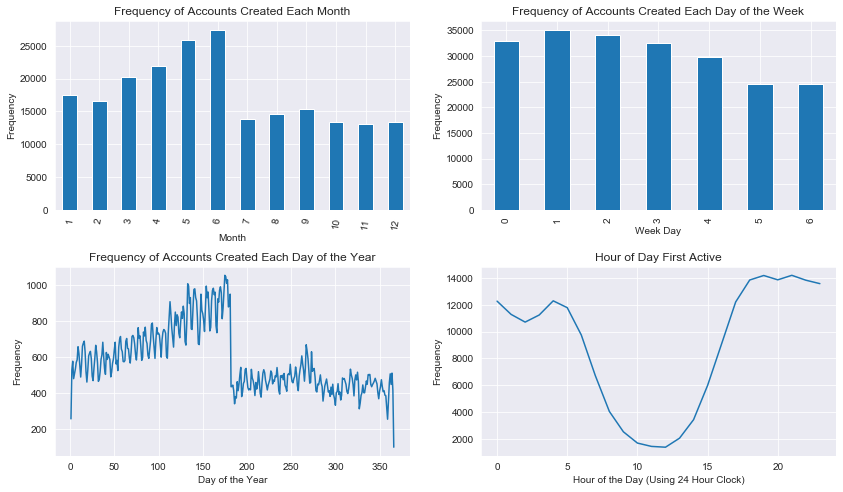

CPU times: user 3.03 s, sys: 90.7 ms, total: 3.13 s
Wall time: 3.16 s


In [13]:
%%time

## Graphing Seasonal Activity   

fig = plt.figure(figsize=(14, 8))
fig.subplots_adjust(hspace=.3)

# Barplot of Monthly Usage
plt.subplot(2, 2, 1)
ax = df.month_account_created.value_counts().sort_index().plot(kind='bar',  
                                    
                                    title="Frequency of Accounts Created Each Month")
ax.set_xlabel("Month")
ax.set_ylabel("Frequency")
plt.xticks(rotation=80)

# Barplot of Usage During Week
plt.subplot(2, 2, 2)
ax = df.date_account_created.apply(lambda x: x.weekday()).value_counts().sort_index().plot(kind='bar',
                                    title="Frequency of Accounts Created Each Day of the Week")
ax.set_xlabel("Week Day")
ax.set_ylabel("Frequency")

# Line Graph of Usage over the Year
plt.subplot(2, 2, 3)
ax = df.date_account_created.apply(lambda x: x.dayofyear).value_counts().sort_index().plot(kind='line',
                                    title="Frequency of Accounts Created Each Day of the Year")
ax.set_xlabel("Day of the Year")
ax.set_ylabel("Frequency")

# Line Graph of First Activity Over a Day (24 hour scale)
plt.subplot(2, 2, 4)
ax = df.hour_first_active.value_counts().sort_index().plot(kind='line', 
                                    title="Hour of Day First Active")
ax.set_xlabel("Hour of the Day (Using 24 Hour Clock)")
ax.set_ylabel("Frequency")

plt.show()

The above plots reflect the frequencies use of the platform created across different timespans.
There’s a notable drop of accounts created between June and July. Since summer is a season that is popular for travel, people are less likely to need accounts during this time (because they would’ve presumably made accounts earlier than when they would travel using the service). There is a slight drop of accounts made over the weekends as well. Initial activity drops during the day which is likely the result of people having less time during the average US workday to be on Airbnb.


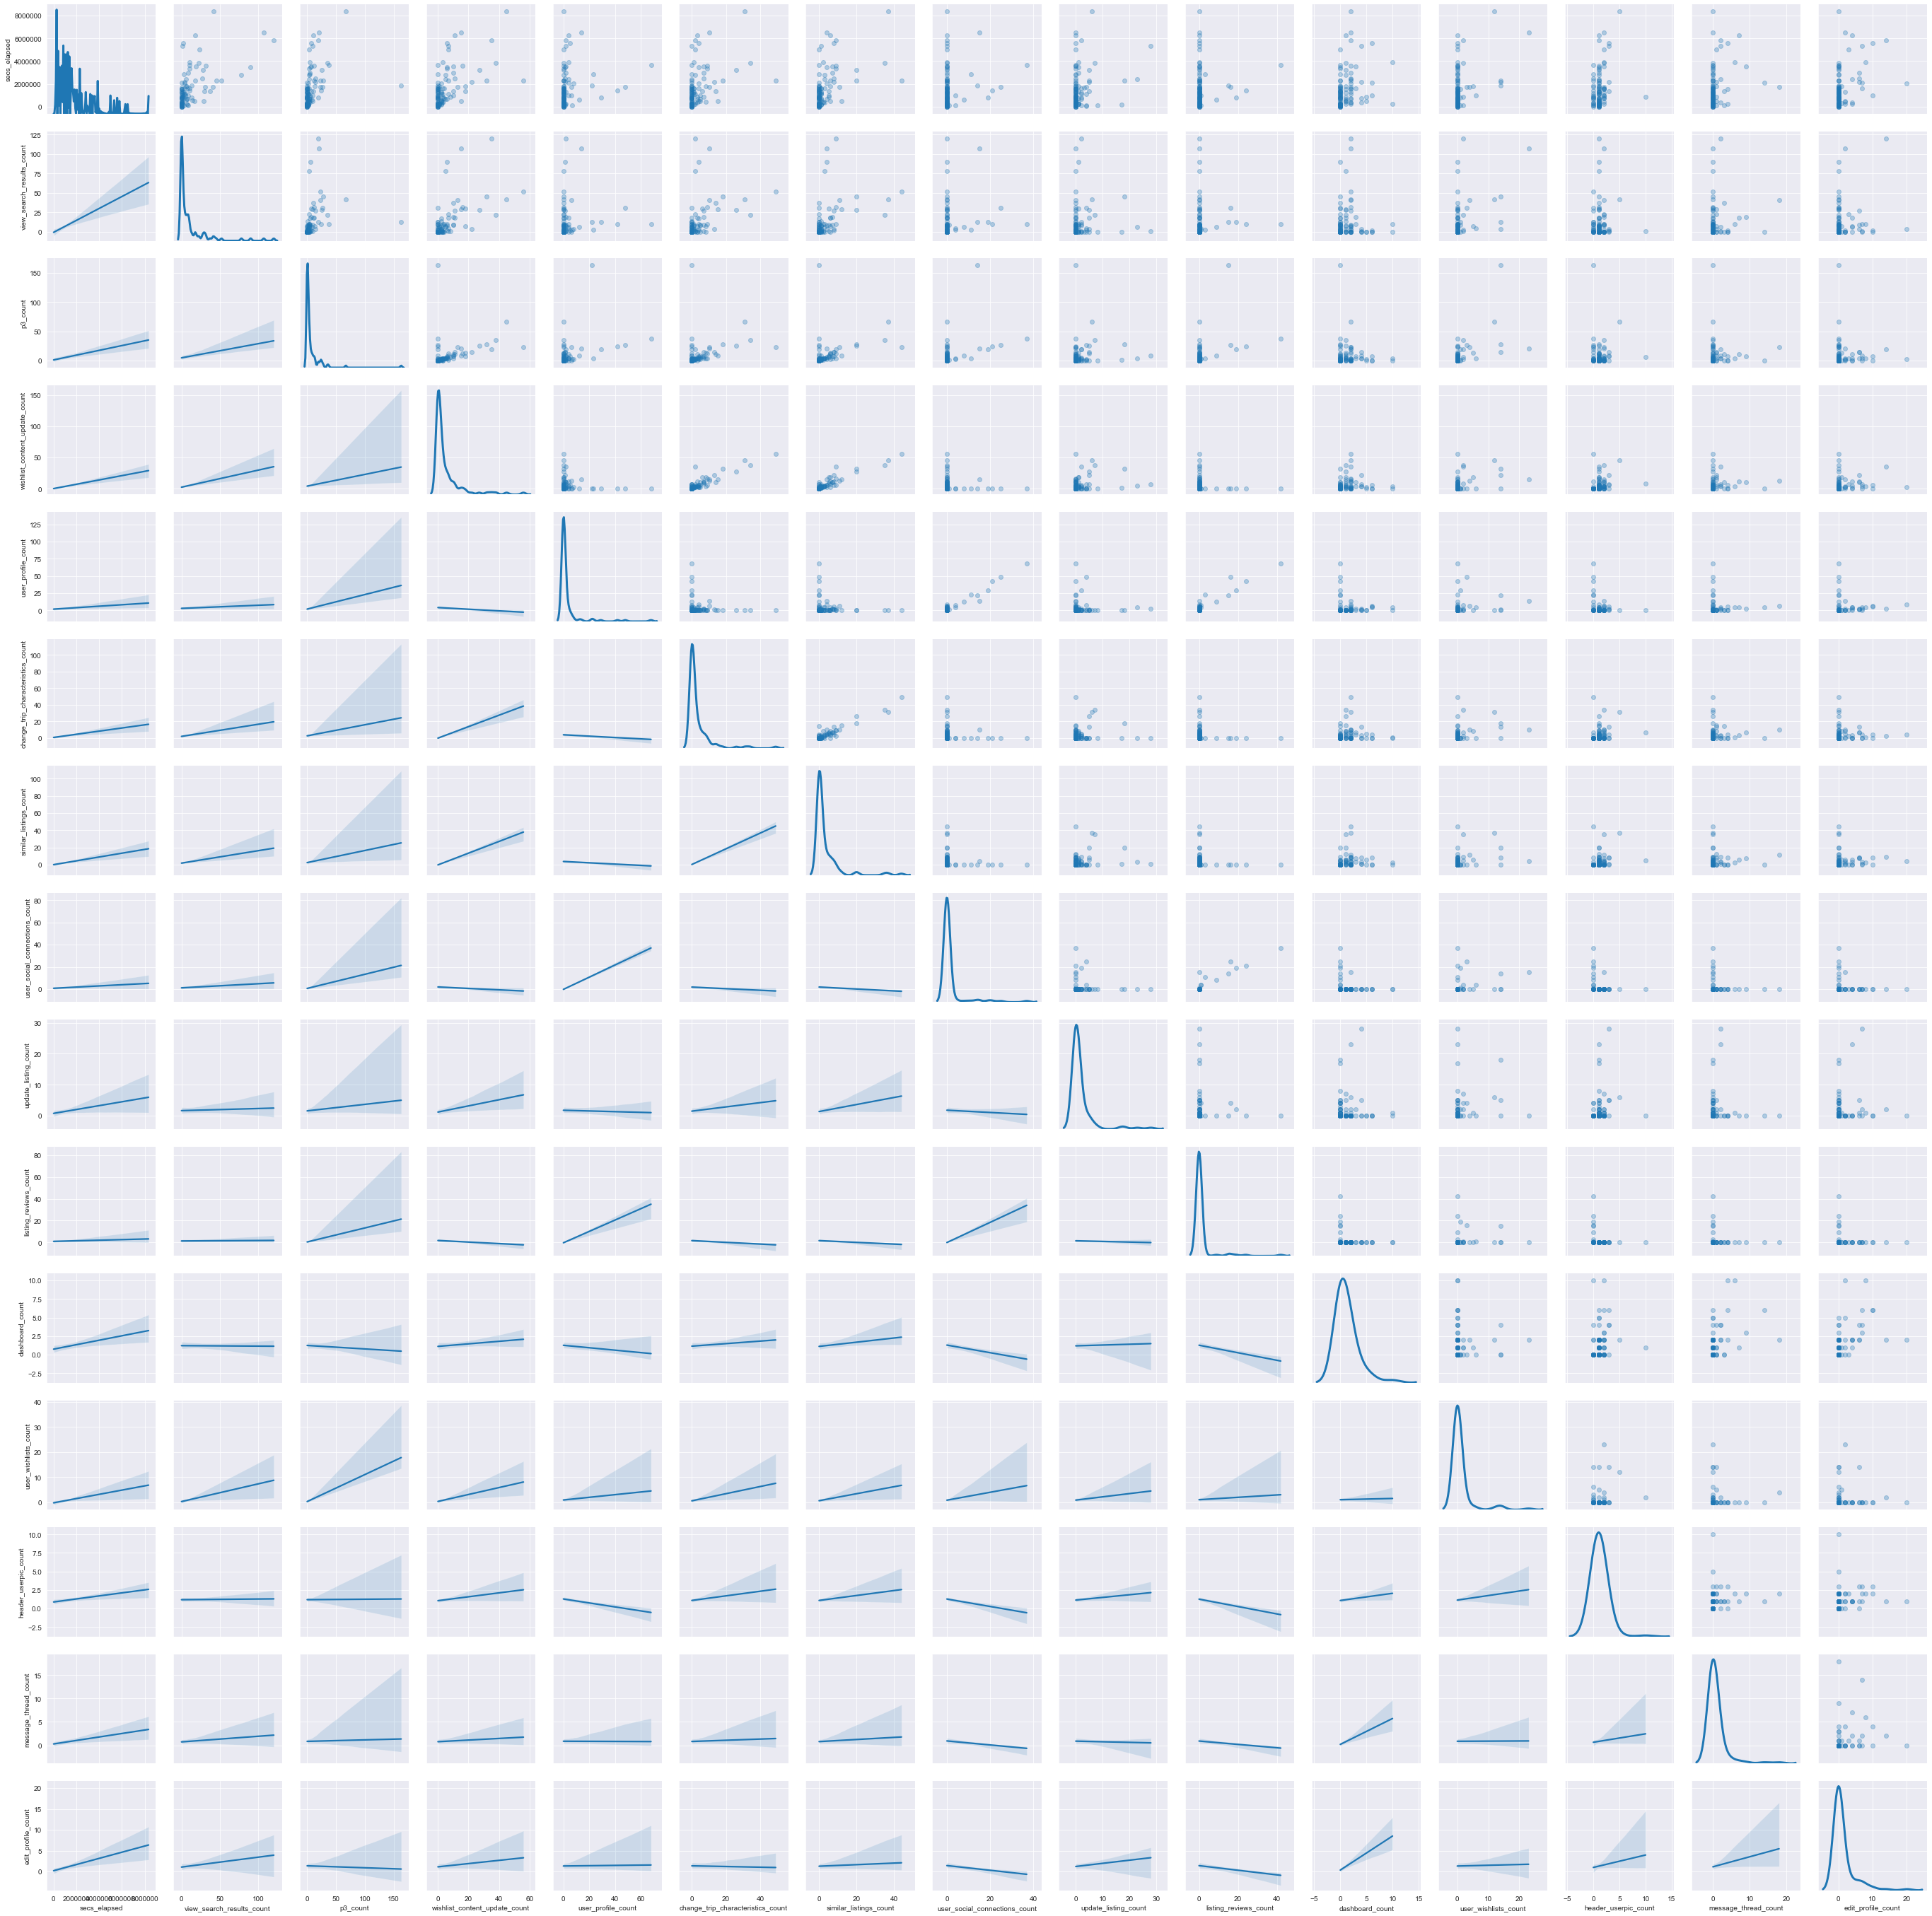

CPU times: user 2min 13s, sys: 3.52 s, total: 2min 17s
Wall time: 1min 16s


In [14]:
%%time

## Creating Scatterplot Matrix with Sample of Original DataFrame

# Store Samples of DataFrame for Visualization
df_sample = df.iloc[:,30:45].dropna().sample(100)

# Declare Pairgrid
g = sns.PairGrid(df_sample.dropna(), diag_sharey=False)

# Scatterplot
g.map_upper(plt.scatter, alpha=.3)

# Fit Line 
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# KDE Plot
g.map_diag(sns.kdeplot, lw=3, bw=1.5)
plt.show()

The scatterplot matrix gives information about the relationship between specific engineered features.

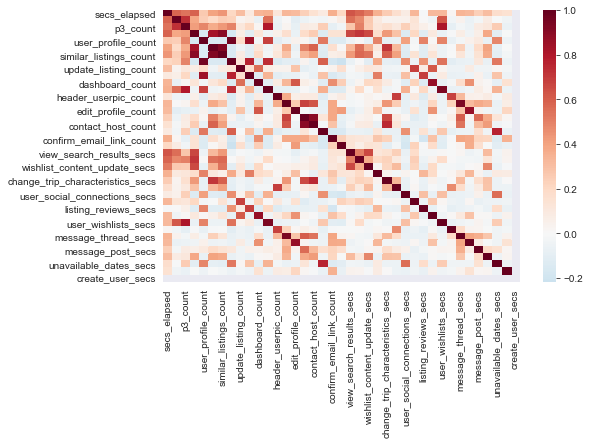

CPU times: user 583 ms, sys: 72.9 ms, total: 656 ms
Wall time: 665 ms


In [15]:
%%time

## Visualizing the Correlatedness of the Session variables

fig, ax = plt.subplots(figsize=(8,5))         
sns.heatmap(df.iloc[:,30:].dropna().sample(100).corr(), cmap='RdBu_r', center=0)
plt.show()

The heatmap is meant to gauge the correlatedness of engineered features. There is much correlatedness among these features, which is expected since they reflect amounts of time spent on the platform.

In [16]:
%%time

## Descriptive Statistics

df.iloc[:,30:].describe()

CPU times: user 276 ms, sys: 42.5 ms, total: 318 ms
Wall time: 327 ms


,secs_elapsed,view_search_results_count,p3_count,wishlist_content_update_count,user_profile_count,change_trip_characteristics_count,similar_listings_count,user_social_connections_count,update_listing_count,listing_reviews_count,...,dashboard_secs,user_wishlists_secs,header_userpic_secs,message_thread_secs,edit_profile_secs,message_post_secs,contact_host_secs,unavailable_dates_secs,confirm_email_link_secs,create_user_secs
count,73815.000,73815.000,73815.000,73815.000,73815.000,73815.000,73815.000,73815.000,73815.000,73815.000,...,73815.000,73815.000,73815.000,73815.000,73815.000,73815.000,73815.000,73815.000,73815.000,73815.000
mean,1514234.959,12.366,8.265,6.093,3.634,4.278,4.172,1.940,2.105,1.128,...,14830.135,29595.309,4515.531,51134.615,16820.605,74545.834,21243.895,7023.293,94984.878,100.872
std,1913191.475,28.446,20.404,13.310,14.324,9.715,10.018,9.129,8.068,5.697,...,112658.964,177757.650,45779.443,306877.869,93129.557,268323.753,104188.163,53648.290,259453.037,7967.568
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,256920.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,143.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,872862.000,2.000,2.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,695.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,2043487.500,13.000,9.000,6.000,2.000,4.000,4.000,0.000,1.000,0.000,...,1268.000,0.000,2356.000,0.000,0.000,1583.000,427.000,0.000,44589.000,0.000
max,38221363.000,987.000,1131.000,524.000,454.000,308.000,325.000,280.000,249.000,198.000,...,4632786.000,6713259.000,2288760.000,11242289.000,3415239.000,13260005.000,3258808.000,2310246.000,2902601.000,1723704.000


Data will be normalized prior to modeling to account for the vast difference in scale of the variables.

## Preparing The Data For Modeling

To prepare the data for modeling, values were imputed, the data was resampled to address the class imbalance in the outcome, and multiple forms of feature reduction were implemented. 
This resulted in four sets of variables: One reflecting all of the unaltered features of the dataset, one reflecting features with the highest F values, one reflecting features with the highest chi squared values, and encoded for deep learning.

In [17]:
%%time

## Creating Modeling DataFrame

# Feature Selection
train_feature_names = ['language', 'age','gender','first_device_type',
                               'signup_app','affiliate_provider','affiliate_channel',
                               'month_first_active','signup_method','day_account_created',
                               'month_account_created','country_destination']

df = df[train_feature_names + session_feature_names]

# Keep Records with Session Features
df = df[df['secs_elapsed'].notnull()]

print(np.array(df.columns))

['language' 'age' 'gender' 'first_device_type' 'signup_app'
 'affiliate_provider' 'affiliate_channel' 'month_first_active'
 'signup_method' 'day_account_created' 'month_account_created'
 'country_destination' 'secs_elapsed' 'view_search_results_count'
 'p3_count' 'wishlist_content_update_count' 'user_profile_count'
 'change_trip_characteristics_count' 'similar_listings_count'
 'user_social_connections_count' 'update_listing_count'
 'listing_reviews_count' 'dashboard_count' 'user_wishlists_count'
 'header_userpic_count' 'message_thread_count' 'edit_profile_count'
 'message_post_count' 'contact_host_count' 'unavailable_dates_count'
 'confirm_email_link_count' 'create_user_count' 'view_search_results_secs'
 'p3_secs' 'wishlist_content_update_secs' 'user_profile_secs'
 'change_trip_characteristics_secs' 'similar_listings_secs'
 'user_social_connections_secs' 'update_listing_secs'
 'listing_reviews_secs' 'dashboard_secs' 'user_wishlists_secs'
 'header_userpic_secs' 'message_thread_secs' 'ed

In [18]:
%%time

## Impute Ages with Group Means 

df['age'] = df.groupby([ 'signup_method','country_destination', 'first_device_type'])['age'].transform(lambda x: x.fillna(x.mean()))

CPU times: user 119 ms, sys: 31.2 ms, total: 150 ms
Wall time: 152 ms


In [19]:
%%time

## Creating DataFrame for Imputation of Gender

df_impute_gender = df.dropna()

## Class Balancing and Resampling Imputation DataFrame for Random Forest Imputation

records_per_class = 18000

# Separate Majority and Minority Classes
df_majority = df_impute_gender[df_impute_gender.gender=='female']
df_minority = df_impute_gender[df_impute_gender.gender=='male']

# Upsample Minority Class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=records_per_class,    
                                 random_state=123) 

# Downsample Majority Class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=records_per_class,     
                                 random_state=123) 

# Combine Downsampled Majority Class With Upsampled Minority Class
df_impute_gender = pd.concat([df_majority_downsampled, df_minority_upsampled])

print(df_impute_gender.gender.value_counts())

male      18000
female    18000
Name: gender, dtype: int64
CPU times: user 91.5 ms, sys: 28.9 ms, total: 120 ms
Wall time: 124 ms


In [20]:
%%time

## Random Forest Imputation 

# Create Gender Column for Imputation Using Random Forests
x = pd.get_dummies(df_impute_gender.drop(['gender', 'age','signup_method','affiliate_channel','first_device_type','signup_app','affiliate_provider', 'language'], axis=1))
y = df_impute_gender['gender']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

rfc = ensemble.RandomForestClassifier().fit(x_train,  y_train)

imputed_gender = rfc.predict(pd.get_dummies(df.drop(['gender', 'age','signup_method','affiliate_channel','first_device_type','signup_app','affiliate_provider', 'language'],1)))

# Imputing Gender with Predicted Values
df['gender'] = np.where(df['gender'].isnull(), imputed_gender, df['gender'])

# Shedding Remaining Null Values
df = df.dropna()

## Create Dataframe only Containing NDF Destinations for Predictions

df_predict = df[df['country_destination'] == 'NDF']

CPU times: user 9.43 s, sys: 285 ms, total: 9.72 s
Wall time: 9.87 s


In [21]:
%%time

## Class Balancing and Resampling of Training DataFrame

country_names = df.country_destination.unique()[df.country_destination.unique() != 'NDF']
records_per_class = 9000

df_resampled = pd.DataFrame()
for country in country_names:
    if len(df[df['country_destination'] == country]) >= records_per_class:
        df_resample_1 = df[df['country_destination'] == country]
        df_resample_1 = resample(df_resample_1, replace=False, n_samples=records_per_class, random_state=123)
        df_resampled = df_resampled.append(df_resample_1)
    else: 
        df_resample_2 = df[df['country_destination'] == country]
        df_resample_2 = resample(df_resample_2, replace=True, n_samples=records_per_class, random_state=123)
        df_resampled = df_resampled.append(df_resample_2)


print(df_resampled.country_destination.value_counts()) 

GB       9000
DE       9000
ES       9000
US       9000
other    9000
FR       9000
IT       9000
CA       9000
PT       9000
AU       9000
NL       9000
Name: country_destination, dtype: int64
CPU times: user 592 ms, sys: 309 ms, total: 901 ms
Wall time: 914 ms


In [22]:
%%time

## Establish DataFrame to be Used for Modeling

df = df_resampled

# Get Dummies so Categorical Variables Can be Used in Classification 
df = pd.get_dummies(df.drop(['country_destination'], axis=1))
df_predict = pd.get_dummies(df_predict.drop(['country_destination'], axis=1))

# Display New Number of Features
print('Number of Features: '+ str(len(df.columns)))

Number of Features: 101
CPU times: user 185 ms, sys: 87.5 ms, total: 272 ms
Wall time: 272 ms


In [23]:
%%time

## Identify Features Not shared By Training and Prediction Datasets

def Diff(list1, list2): 
    return (list(list(set(list1)-set(list2)) + list(set(list2)-set(list1))))

uncommon_features = Diff(list(df.columns), list(df_predict.columns))

print('Sparse Features:')
print(uncommon_features)

## Remove Features Not shared By Training and Prediction Datasets

for i in df.columns:
    if i in uncommon_features:
        df = df.drop([i], axis=1)

for i in df_predict.columns:
    if i in uncommon_features:
        df_predict = df_predict.drop([i], axis=1)
        
## Save Feature Names

feature_names = df.columns

#df.columns == df_predict.columns

Sparse Features:
['affiliate_provider_daum', 'language_da', 'language_th', 'language_hu', 'language_no', 'language_id', 'affiliate_provider_craigslist', 'affiliate_provider_yandex', 'language_ca', 'language_is']
CPU times: user 96.6 ms, sys: 70.6 ms, total: 167 ms
Wall time: 166 ms


In [24]:
%%time

## Rescaling Modeling DataFrame

min_max_scaler = MinMaxScaler(feature_range=(0,1))

df = pd.DataFrame(min_max_scaler.fit_transform(df))

## Rescaling Predictions DataFrame

df_predict = pd.DataFrame(min_max_scaler.transform(df_predict))

## Creating a Numeric Version of the Outcome Variable

df_resampled['country_destination_categorical'] = df_resampled['country_destination'].astype('category').cat.codes

## Return Names to Datasets

df.columns = feature_names

df_predict.columns = feature_names

CPU times: user 190 ms, sys: 117 ms, total: 307 ms
Wall time: 320 ms


In [25]:
%%time

## Establish Feature and Outcome Variables to be Used for Modeling Based on Original Features

x = df
y = df_resampled['country_destination']

# This is a Version of the Outcome Variable Encoded for Deep Learning
Y = keras.utils.to_categorical(df_resampled['country_destination_categorical'], len(country_names))

CPU times: user 2.69 ms, sys: 13 ms, total: 15.7 ms
Wall time: 14.6 ms


In [26]:
%%time

## PCA

# Normalize the Data for PCA
X = StandardScaler().fit_transform(x)

# Perform PCA
sklearn_pca = PCA(n_components=15)
Y_sklearn = sklearn_pca.fit_transform(X)

# Turn PCA Result into a Dataframe
pca_components = pd.DataFrame(data=Y_sklearn)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

print(
    '\nThe percentage of total variance in the dataset explained by all',
    'components from Sklearn PCA.\n',
    sum(sklearn_pca.explained_variance_ratio_)
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.07312254 0.06151971 0.03578576 0.03139949 0.0295689  0.02440928
 0.02310617 0.02126539 0.02026077 0.01902329 0.01800086 0.01642176
 0.01585538 0.01551371 0.01454801]

The percentage of total variance in the dataset explained by all components from Sklearn PCA.
 0.41980100472484805
CPU times: user 2.26 s, sys: 308 ms, total: 2.57 s
Wall time: 1.05 s


### Feature Selection Using F values

In [27]:
%%time

## Establish variables based on select K best to be used for modeling

selector = SelectKBest(f_classif, k=60)
k_predictors = selector.fit_transform(x,y)


CPU times: user 263 ms, sys: 129 ms, total: 392 ms
Wall time: 415 ms


In [28]:
%%time

## Print Most Variables Deemed Most Important By SelectKbest

importance = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(selector.fit(x, y).scores_)], axis=1)
importance.columns = ['feature', 'importance']
importance = importance.sort_values(by=['importance'], ascending=False)
print(np.array(list(importance.head(60)['feature'])))

['gender_male' 'gender_female' 'language_de' 'message_post_secs'
 'month_account_created' 'month_first_active' 'age' 'contact_host_secs'
 'first_device_type_Windows Desktop' 'language_pl' 'contact_host_count'
 'change_trip_characteristics_count' 'view_search_results_secs'
 'wishlist_content_update_count' 'confirm_email_link_count' 'language_fr'
 'signup_app_Web' 'message_post_count' 'first_device_type_Mac Desktop'
 'similar_listings_count' 'edit_profile_count' 'first_device_type_iPhone'
 'affiliate_provider_bing' 'update_listing_secs' 'signup_app_iOS'
 'confirm_email_link_secs' 'affiliate_provider_facebook'
 'create_user_count' 'language_en' 'signup_app_Android'
 'first_device_type_Android Phone' 'similar_listings_secs'
 'affiliate_channel_sem-brand' 'signup_method_google' 'edit_profile_secs'
 'secs_elapsed' 'p3_count' 'first_device_type_Desktop (Other)'
 'wishlist_content_update_secs' 'language_nl' 'signup_method_basic'
 'language_zh' 'unavailable_dates_count'
 'first_device_type_Andr

In [29]:
%%time

## PCA

# Normalize the Data for PCA
X = StandardScaler().fit_transform(k_predictors)

# Perform PCA
sklearn_pca = PCA(n_components=15)
Y_sklearn = sklearn_pca.fit_transform(X)

# Turn PCA Result into a Dataframe
f_pca_components = pd.DataFrame(data=Y_sklearn)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)


print(
    '\nThe percentage of total variance in the dataset explained by all',
    'components from Sklearn PCA.\n',
    sum(sklearn_pca.explained_variance_ratio_)
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.11102034 0.08475005 0.04680018 0.04013515 0.0377128  0.03332815
 0.03174314 0.03117173 0.0286788  0.02839411 0.02642573 0.02447956
 0.0208382  0.01897973 0.01856214]

The percentage of total variance in the dataset explained by all components from Sklearn PCA.
 0.5830198033040455
CPU times: user 1.88 s, sys: 239 ms, total: 2.12 s
Wall time: 700 ms


### Feature Selection Using Chi-squared 

In [30]:
%%time

## Establish variables based on select K best to be used for modeling

selector = SelectKBest(chi2, k=60)
k_predictors = selector.fit_transform(x,y)


CPU times: user 617 ms, sys: 47.2 ms, total: 664 ms
Wall time: 507 ms


In [31]:
%%time

## Print Most Variables Deemed Most Important By SelectKbest

importance = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(selector.fit(x, y).scores_)], axis=1)
importance.columns = ['feature', 'importance']
importance = importance.sort_values(by=['importance'], ascending=False)
print(np.array(list(importance.head(60)['feature'])))

['gender_male' 'language_de' 'gender_female' 'language_pl' 'language_fr'
 'first_device_type_Windows Desktop' 'affiliate_provider_bing'
 'first_device_type_iPhone' 'affiliate_provider_facebook' 'signup_app_iOS'
 'first_device_type_Android Phone' 'signup_app_Android'
 'signup_method_google' 'first_device_type_Desktop (Other)' 'language_nl'
 'language_zh' 'first_device_type_Android Tablet' 'language_it'
 'affiliate_channel_content' 'affiliate_channel_sem-brand'
 'affiliate_channel_api' 'language_ko' 'affiliate_provider_other'
 'first_device_type_Mac Desktop' 'signup_method_facebook'
 'affiliate_channel_sem-non-brand' 'language_es' 'language_sv'
 'affiliate_channel_other' 'first_device_type_iPad' 'language_ja'
 'affiliate_provider_google' 'month_first_active' 'month_account_created'
 'first_device_type_Other/Unknown' 'affiliate_provider_yahoo'
 'affiliate_channel_remarketing' 'affiliate_provider_padmapper'
 'contact_host_secs' 'signup_app_Moweb' 'language_ru'
 'affiliate_channel_seo' 'lan

In [32]:
%%time

## PCA

# Normalize the Data for PCA
X = StandardScaler().fit_transform(k_predictors)

# Perform PCA
sklearn_pca = PCA(n_components=15)
Y_sklearn = sklearn_pca.fit_transform(X)

# Turn PCA Result into a Dataframe
x_pca_components = pd.DataFrame(data=Y_sklearn)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)


print(
    '\nThe percentage of total variance in the dataset explained by all',
    'components from Sklearn PCA.\n',
    sum(sklearn_pca.explained_variance_ratio_)
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.06716308 0.05427733 0.04037939 0.03689862 0.0361625  0.03347643
 0.02946619 0.02745263 0.02713259 0.02577053 0.02302423 0.02218071
 0.01903522 0.0188951  0.01822679]

The percentage of total variance in the dataset explained by all components from Sklearn PCA.
 0.4795413480322345
CPU times: user 2.13 s, sys: 250 ms, total: 2.38 s
Wall time: 744 ms


### Declaring Variables

In [33]:
%%time

## Train Test Split the Four Sets of Feature and Outcome Variables

# Unaltered Features
x_train, x_test, y_train, y_test = train_test_split(pca_components, y, test_size=0.2, random_state=20)

# F-Value
fx_train, fx_test, fy_train, fy_test = train_test_split(f_pca_components, y, test_size=0.2, random_state=22)

# Chi-squared
xx_train, xx_test, xy_train, xy_test = train_test_split(x_pca_components, y, test_size=0.2, random_state=21)

# Deep Learning
X_train, X_test, Y_train, Y_test = train_test_split(np.asarray(f_pca_components), np.asarray(Y), test_size=0.2, random_state=20)


CPU times: user 181 ms, sys: 38.4 ms, total: 219 ms
Wall time: 141 ms


Training and testing sets of four variables were generated to be used in modeling.
The x and y variables represent the variables to be used for modeling that reflect the all of the useful features of the data. 
The px and py variables represent the variables to be used for modeling that reflect PCA components of the initial features.
The kx and ky variables represent the variables to be used for modeling that reflect features chosen by selectKbest.
The X and Y variables represent the variables converted to arrays to be used for deep learning. 

## Supervised Modeling using All Features

### K Nearest Neighbors 

In [34]:
%%time

## Train and Fit Model

knn = neighbors.KNeighborsClassifier(n_neighbors=1).fit(x_train, y_train)


CPU times: user 250 ms, sys: 11.7 ms, total: 262 ms
Wall time: 272 ms


In [35]:
%%time

## Training Set Evaluation

print('Training Set Evaluation\n')

print("accuracy score:\n" + str(knn.score(x_train, y_train))+'\n')

print("cross validation:\n" + str(cross_val_score(knn, x_train, y_train, cv=5))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_train, knn.predict(x_train)))+'\n')

print(classification_report(y_train, knn.predict(x_train)))


Training Set Evaluation

accuracy score:
1.0

cross validation:
[0.93554293 0.93396465 0.92941919 0.93295455 0.93333333]

confusion matrix:
[[7161    0    0    0    0    0    0    0    0    0    0]
 [   0 7145    0    0    0    0    0    0    0    0    0]
 [   0    0 7213    0    0    0    0    0    0    0    0]
 [   0    0    0 7186    0    0    0    0    0    0    0]
 [   0    0    0    0 7159    0    0    0    0    0    0]
 [   0    0    0    0    0 7218    0    0    0    0    0]
 [   0    0    0    0    0    0 7211    0    0    0    0]
 [   0    0    0    0    0    0    0 7206    0    0    0]
 [   0    0    0    0    0    0    0    0 7221    0    0]
 [   0    0    0    0    0    0    0    0    0 7272    0]
 [   0    0    0    0    0    0    0    0    0    0 7208]]

              precision    recall  f1-score   support

          AU       1.00      1.00      1.00      7161
          CA       1.00      1.00      1.00      7145
          DE       1.00      1.00      1.00      7213
   

In [36]:
%%time

## Test Set Evaluation

print('Test Set Evaluation\n')

print("accuracy score:\n" + str(knn.score(x_test, y_test))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_test, knn.predict(x_test)))+'\n')

print(classification_report(y_test, knn.predict(x_test)))


Test Set Evaluation

accuracy score:
0.9445454545454546

confusion matrix:
[[1839    0    0    0    0    0    0    0    0    0    0]
 [   0 1855    0    0    0    0    0    0    0    0    0]
 [   0    0 1787    0    0    0    0    0    0    0    0]
 [   0    0    0 1814    0    0    0    0    0    0    0]
 [   0    0    1    0 1830    0    0    0    0    9    1]
 [   0    0    0    0    0 1782    0    0    0    0    0]
 [   0    0    0    0    2    0 1787    0    0    0    0]
 [   0    0    0    0    0    0    0 1794    0    0    0]
 [   0    0    0    0    0    0    0    0 1779    0    0]
 [  13   56   24   71  163   78  101   22   15  823  362]
 [   3    5    1   11   23    6   11    3    2  115 1612]]

              precision    recall  f1-score   support

          AU       0.99      1.00      1.00      1839
          CA       0.97      1.00      0.98      1855
          DE       0.99      1.00      0.99      1787
          ES       0.96      1.00      0.98      1814
          FR  

### Decision Tree

In [37]:
%%time

## Search for Best Parameters

dt = tree.DecisionTreeClassifier()

parameters = { 
              'max_features': list(range(8,15)),
              'max_depth': list(range(24,34))
             }

acc_scorer = make_scorer(accuracy_score)

decision_tree_grid_search = GridSearchCV(dt, parameters, scoring=acc_scorer).fit(x_train,  y_train)

print(decision_tree_grid_search.best_params_)


{'max_depth': 33, 'max_features': 8}
CPU times: user 5min 42s, sys: 6.58 s, total: 5min 49s
Wall time: 5min 56s


In [38]:
%%time

## Fit and Train Model

decision_tree = tree.DecisionTreeClassifier(
    ).set_params(**decision_tree_grid_search.best_params_).fit(x_train, y_train)

CPU times: user 776 ms, sys: 11.6 ms, total: 787 ms
Wall time: 802 ms


In [39]:
%%time

## Training Set Evaluation

print('Training Set Evaluation\n')

print("accuracy score:\n" + str(decision_tree.score(x_train, y_train))+'\n')

print("cross validation:\n" + str(cross_val_score(decision_tree, x_train, y_train, cv=5))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_train, decision_tree.predict(x_train)))+'\n')

print(classification_report(y_train, decision_tree.predict(x_train)))


Training Set Evaluation

accuracy score:
0.9949621212121212

cross validation:
[0.91041667 0.91458333 0.91893939 0.92619949 0.9207702 ]

confusion matrix:
[[7161    0    0    0    0    0    0    0    0    0    0]
 [   0 7133    0    0    0   12    0    0    0    0    0]
 [   0    0 7213    0    0    0    0    0    0    0    0]
 [   0    0    0 7166    0   12    0    0    0    8    0]
 [   0    3    0    5 7116   15    3    0    0    6   11]
 [   0    7    0    0    6 7205    0    0    0    0    0]
 [   0    0    0    0    0    4 7206    0    0    0    1]
 [   0    0    0    0    0    0    0 7206    0    0    0]
 [   0    0    0    0    0    0    0    0 7221    0    0]
 [   0    7    0   12   89   17   14    0    0 7100   33]
 [   0    8    0    7   67   22    9    0    0   21 7074]]

              precision    recall  f1-score   support

          AU       1.00      1.00      1.00      7161
          CA       1.00      1.00      1.00      7145
          DE       1.00      1.00      1.0

In [40]:
%%time

## Test Set Evaluation

print('Test Set Evaluation\n')

print("accuracy score:\n" + str(decision_tree.score(x_test, y_test))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_test, decision_tree.predict(x_test)))+'\n')

print(classification_report(y_test, decision_tree.predict(x_test)))


Test Set Evaluation

accuracy score:
0.9384848484848485

confusion matrix:
[[1839    0    0    0    0    0    0    0    0    0    0]
 [   0 1848    0    0    0    7    0    0    0    0    0]
 [   0    0 1787    0    0    0    0    0    0    0    0]
 [   0    0    0 1803    0    3    0    0    0    8    0]
 [   0    0    0    2 1810    5    1    8    0    5   10]
 [   0    2    0    0    2 1778    0    0    0    0    0]
 [   0    0    0    0    2    0 1785    0    0    0    2]
 [   0    0    0    0    0    0    0 1794    0    0    0]
 [   0    0    0    0    0    0    0    0 1779    0    0]
 [  19   63   31   87  148  104  115   33   14  762  352]
 [   0   13    4   13   24   15   18    5    0  103 1597]]

              precision    recall  f1-score   support

          AU       0.99      1.00      0.99      1839
          CA       0.96      1.00      0.98      1855
          DE       0.98      1.00      0.99      1787
          ES       0.95      0.99      0.97      1814
          FR  

### Random Forest

In [41]:
%%time

## Search For Best Parameters

rf = ensemble.RandomForestClassifier()

parameters = { 
              'max_features': ['log2', 'sqrt','auto'],  
             }

acc_scorer = make_scorer(accuracy_score)

rfc_grid_search = GridSearchCV(rf, parameters, scoring=acc_scorer).fit(x_train,  y_train)

print(rfc_grid_search.best_params_)

{'max_features': 'auto'}
CPU times: user 4min 34s, sys: 5 s, total: 4min 39s
Wall time: 4min 42s


In [42]:
%%time

## Fit and Train Model

rfc = ensemble.RandomForestClassifier(
    ).set_params(**rfc_grid_search.best_params_).fit(x_train, y_train)

CPU times: user 19.3 s, sys: 180 ms, total: 19.5 s
Wall time: 19.6 s


In [43]:
%%time

## Training Set Evaluation

print('Training Set Evaluation\n')

print("accuracy score:\n" + str(rfc.score(x_train, y_train))+'\n')

print("cross validation:\n" + str(cross_val_score(rfc, x_train, y_train, cv=5))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_train, rfc.predict(x_train)))+'\n')

print(classification_report(y_train, rfc.predict(x_train)))


Training Set Evaluation

accuracy score:
1.0

cross validation:
[0.95751263 0.95738636 0.95498737 0.95542929 0.95650253]

confusion matrix:
[[7161    0    0    0    0    0    0    0    0    0    0]
 [   0 7145    0    0    0    0    0    0    0    0    0]
 [   0    0 7213    0    0    0    0    0    0    0    0]
 [   0    0    0 7186    0    0    0    0    0    0    0]
 [   0    0    0    0 7159    0    0    0    0    0    0]
 [   0    0    0    0    0 7218    0    0    0    0    0]
 [   0    0    0    0    0    0 7211    0    0    0    0]
 [   0    0    0    0    0    0    0 7206    0    0    0]
 [   0    0    0    0    0    0    0    0 7221    0    0]
 [   0    0    0    0    0    0    0    0    0 7272    0]
 [   0    0    0    0    0    0    0    0    0    0 7208]]

              precision    recall  f1-score   support

          AU       1.00      1.00      1.00      7161
          CA       1.00      1.00      1.00      7145
          DE       1.00      1.00      1.00      7213
   

In [44]:
%%time

## Test Set Evaluation

print('Test Set Evaluation\n')

print("accuracy score:\n" + str(rfc.score(x_test, y_test))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_test, rfc.predict(x_test)))+'\n')

print(classification_report(y_test, rfc.predict(x_test)))


Test Set Evaluation

accuracy score:
0.9708080808080808

confusion matrix:
[[1839    0    0    0    0    0    0    0    0    0    0]
 [   0 1855    0    0    0    0    0    0    0    0    0]
 [   0    0 1787    0    0    0    0    0    0    0    0]
 [   0    0    0 1814    0    0    0    0    0    0    0]
 [   0    0    0    3 1826    1    0    0    0   11    0]
 [   0    0    0    0    0 1782    0    0    0    0    0]
 [   0    0    0    0    2    0 1787    0    0    0    0]
 [   0    0    0    0    0    0    0 1794    0    0    0]
 [   0    0    0    0    0    0    0    0 1779    0    0]
 [   1   13    2   20   68   14   34    3    3 1336  234]
 [   1    1    0    2   14    0    4    0    0  147 1623]]

              precision    recall  f1-score   support

          AU       1.00      1.00      1.00      1839
          CA       0.99      1.00      1.00      1855
          DE       1.00      1.00      1.00      1787
          ES       0.99      1.00      0.99      1814
          FR  


The models that relied on the dataset’s unreduced features, in general, had the best accuracy in the study. An advantage of using all of the useful features is that as much meaningful variance was captured by the models as possible. A downside to this type of feature preparation that did stand out is the lack of efficiency. Since feature reduction didn’t take place with these models, their performance suffered and they had the longest runtimes. This method of feature selection also risks including features with variance that doesn’t aid in the predictive power of the models. However, this potential disadvantage didn’t hamper the model’s ability to perform well because many of the features that would noticeably have a negative effect on the models were already left out. 



## Modeling the Data using Features with High F-Values

### K Nearest Neighbors 

In [45]:
%%time

## Train and Fit Model

f_knn = neighbors.KNeighborsClassifier(n_neighbors=1).fit(fx_train, fy_train)


CPU times: user 244 ms, sys: 7.65 ms, total: 251 ms
Wall time: 251 ms


In [46]:
%%time

## Training Set Evaluation

print('Training Set Evaluation\n')

print("accuracy score:\n" + str(f_knn.score(fx_train, fy_train))+'\n')

print("cross validation:\n" + str(cross_val_score(f_knn, fx_train, fy_train, cv=5))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(fy_train, f_knn.predict(fx_train)))+'\n')

print(classification_report(fy_train, f_knn.predict(fx_train)))


Training Set Evaluation

accuracy score:
0.99989898989899

cross validation:
[0.9322601  0.93194444 0.93484848 0.93289141 0.93440657]

confusion matrix:
[[7230    0    0    0    0    0    0    0    0    0    0]
 [   0 7225    0    0    0    0    0    0    0    0    0]
 [   0    0 7239    0    0    0    0    0    0    0    0]
 [   0    0    0 7169    0    0    0    0    0    0    0]
 [   0    0    0    0 7142    0    0    0    0    0    8]
 [   0    0    0    0    0 7212    0    0    0    0    0]
 [   0    0    0    0    0    0 7167    0    0    0    0]
 [   0    0    0    0    0    0    0 7194    0    0    0]
 [   0    0    0    0    0    0    0    0 7202    0    0]
 [   0    0    0    0    0    0    0    0    0 7225    0]
 [   0    0    0    0    0    0    0    0    0    0 7187]]

              precision    recall  f1-score   support

          AU       1.00      1.00      1.00      7230
          CA       1.00      1.00      1.00      7225
          DE       1.00      1.00      1.00 

In [47]:
%%time

## Test Set Evaluation

print('Test Set Evaluation\n')

print("accuracy score:\n" + str(f_knn.score(fx_test, fy_test))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(fy_test, f_knn.predict(fx_test)))+'\n')

print(classification_report(fy_test, f_knn.predict(fx_test)))


Test Set Evaluation

accuracy score:
0.9447979797979797

confusion matrix:
[[1770    0    0    0    0    0    0    0    0    0    0]
 [   0 1775    0    0    0    0    0    0    0    0    0]
 [   0    0 1761    0    0    0    0    0    0    0    0]
 [   0    0    0 1831    0    0    0    0    0    0    0]
 [   0    0    0    0 1830    0    0    2    0    9    9]
 [   0    0    0    0    0 1788    0    0    0    0    0]
 [   0    0    0    0    0    0 1833    0    0    0    0]
 [   0    0    0    0    0    0    0 1806    0    0    0]
 [   0    0    0    0    0    0    0    0 1798    0    0]
 [  16   53   21   84  138   69  109   23    8  915  339]
 [   6   11    3   14   39    9   15    0    1  115 1600]]

              precision    recall  f1-score   support

          AU       0.99      1.00      0.99      1770
          CA       0.97      1.00      0.98      1775
          DE       0.99      1.00      0.99      1761
          ES       0.95      1.00      0.97      1831
          FR  

### Decision Tree

In [48]:
%%time

## Search for Best Parameters

dt = tree.DecisionTreeClassifier()

parameters = { 
              'max_features': list(range(8,15)),
              'max_depth': list(range(24,34))
             }

acc_scorer = make_scorer(accuracy_score)

f_decision_tree_grid_search = GridSearchCV(dt, parameters, scoring=acc_scorer).fit(fx_train,  fy_train)

print(f_decision_tree_grid_search.best_params_)


{'max_depth': 33, 'max_features': 9}
CPU times: user 5min 20s, sys: 4.29 s, total: 5min 24s
Wall time: 5min 30s


In [49]:
%%time

## Fit and Train Model

f_decision_tree = tree.DecisionTreeClassifier(
    ).set_params(**f_decision_tree_grid_search.best_params_).fit(fx_train, fy_train)

CPU times: user 1.06 s, sys: 17.4 ms, total: 1.08 s
Wall time: 1.13 s


In [50]:
%%time

## Training Set Evaluation

print('Test Set Evaluation\n')

print("accuracy score:\n" + str(f_decision_tree.score(fx_train, fy_train))+'\n')

print("cross validation:\n" + str(cross_val_score(f_decision_tree, fx_train, fy_train, cv=5))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(fy_train, f_decision_tree.predict(fx_train)))+'\n')

print(classification_report(fy_train, f_decision_tree.predict(fx_train)))


Test Set Evaluation

accuracy score:
0.96125

cross validation:
[0.9239899  0.92910354 0.92771465 0.92241162 0.91439394]

confusion matrix:
[[7230    0    0    0    0    0    0    0    0    0    0]
 [   0 6994    0    0   98    0   45    0    0   10   78]
 [   0    0 7215    0    0    0    0    0    0    0   24]
 [   0    7    0 6848   90    6   56    0    0   52  110]
 [   5   18    0   47 6763   18  110    9    0   81   99]
 [   0   11    0   16  168 6831   68    5    0   71   42]
 [   0   24    0    0  143   25 6886    5    0   19   65]
 [   0    0    0    0   21    0   52 7100    0   21    0]
 [   0    0    0    0    0    0    0    0 7202    0    0]
 [  11   23    6   76  187   53  146    2    0 6469  252]
 [  12   23    2   61  187   65  101    3    0  140 6593]]

              precision    recall  f1-score   support

          AU       1.00      1.00      1.00      7230
          CA       0.99      0.97      0.98      7225
          DE       1.00      1.00      1.00      7239
   

In [51]:
%%time

## Test Set Evaluation

print('Test Set Evaluation\n')

print("accuracy score:\n" + str(f_decision_tree.score(fx_test, fy_test))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(fy_test, f_decision_tree.predict(fx_test)))+'\n')

print(classification_report(fy_test, f_decision_tree.predict(fx_test)))


Test Set Evaluation

accuracy score:
0.9062626262626262

confusion matrix:
[[1770    0    0    0    0    0    0    0    0    0    0]
 [   0 1718    0    0   24    0   12    0    0    4   17]
 [   0    0 1756    0    0    0    0    0    0    0    5]
 [   0    3    0 1737   31    5    9    0    0   10   36]
 [   0    7    0    6 1699    8   37    7    0   40   46]
 [   0    2    0    2   53 1683   13    3    0   16   16]
 [   0    7    0    0   30    4 1767    2    0    2   21]
 [   0    0    0    0   12    0   12 1770    0   12    0]
 [   0    0    0    0    0    0    0    0 1798    0    0]
 [  21   53   35   89  170   93  142   37   15  771  349]
 [   5   10    9   28   59   37   43   11    0  136 1475]]

              precision    recall  f1-score   support

          AU       0.99      1.00      0.99      1770
          CA       0.95      0.97      0.96      1775
          DE       0.98      1.00      0.99      1761
          ES       0.93      0.95      0.94      1831
          FR  

### Random Forest

In [52]:
%%time

## Search For Best Parameters

rf = ensemble.RandomForestClassifier()

parameters = { 
              'max_features': ['log2', 'sqrt','auto'], 
             }

acc_scorer = make_scorer(accuracy_score)

f_rfc_grid_search = GridSearchCV(rf, parameters, scoring=acc_scorer).fit(fx_train, fy_train)

print(f_rfc_grid_search.best_params_)


{'max_features': 'log2'}
CPU times: user 4min 36s, sys: 3.16 s, total: 4min 40s
Wall time: 4min 42s


In [53]:
%%time

## Fit and Train Model

f_rfc = ensemble.RandomForestClassifier(
    ).set_params(**f_rfc_grid_search.best_params_).fit(fx_train, fy_train)

CPU times: user 20.3 s, sys: 167 ms, total: 20.4 s
Wall time: 20.6 s


In [54]:
%%time

## Training Set Evaluation

print('Training Set Evaluation\n')

print("accuracy score:\n" + str(f_rfc.score(fx_train, fy_train))+'\n')

print("cross validation:\n" + str(cross_val_score(f_rfc, fx_train, fy_train, cv=5))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(fy_train, f_rfc.predict(fx_train)))+'\n')

print(classification_report(fy_train, f_rfc.predict(fx_train)))


Training Set Evaluation

accuracy score:
0.9999747474747475

cross validation:
[0.95441919 0.9530303  0.9542298  0.95075758 0.95366162]

confusion matrix:
[[7230    0    0    0    0    0    0    0    0    0    0]
 [   0 7225    0    0    0    0    0    0    0    0    0]
 [   0    0 7239    0    0    0    0    0    0    0    0]
 [   0    0    0 7169    0    0    0    0    0    0    0]
 [   0    0    0    0 7150    0    0    0    0    0    0]
 [   0    0    0    0    0 7212    0    0    0    0    0]
 [   0    0    0    0    0    0 7167    0    0    0    0]
 [   0    0    0    0    0    0    0 7194    0    0    0]
 [   0    0    0    0    0    0    0    0 7202    0    0]
 [   0    0    0    0    0    0    0    0    0 7225    0]
 [   0    0    0    0    2    0    0    0    0    0 7185]]

              precision    recall  f1-score   support

          AU       1.00      1.00      1.00      7230
          CA       1.00      1.00      1.00      7225
          DE       1.00      1.00      1.0

In [55]:
%%time

## Test Set Evaluation

print('Test Set Evaluation\n')

print("accuracy score:\n" + str(f_rfc.score(fx_test, fy_test))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(fy_test, f_rfc.predict(fx_test)))+'\n')

print(classification_report(fy_test, f_rfc.predict(fx_test)))


Test Set Evaluation

accuracy score:
0.965

confusion matrix:
[[1770    0    0    0    0    0    0    0    0    0    0]
 [   0 1775    0    0    0    0    0    0    0    0    0]
 [   0    0 1761    0    0    0    0    0    0    0    0]
 [   0    0    0 1831    0    0    0    0    0    0    0]
 [   0    0    0    0 1827    0    0    2    0   16    5]
 [   0    0    0    0    0 1788    0    0    0    0    0]
 [   0    0    0    0    0    0 1833    0    0    0    0]
 [   0    0    0    0    0    0    0 1806    0    0    0]
 [   0    0    0    0    0    0    0    0 1798    0    0]
 [   2   11    4   33   87   22   52    9    3 1321  231]
 [   1    7    1    8   20    1    5    0    0  173 1597]]

              precision    recall  f1-score   support

          AU       1.00      1.00      1.00      1770
          CA       0.99      1.00      0.99      1775
          DE       1.00      1.00      1.00      1761
          ES       0.98      1.00      0.99      1831
          FR       0.94    



The accuracy scores of the models that used features with high F values were similar to those the models that used unaltered features. This form of feature selection likely removed features that were not vital to the predictive accuracy of the models. This form of feature selection has the advantage advantage of reducing computational complexity and runtimes and in this case, this made up lack of difference in accuracy of the better performing model types.

 

## Modeling the Data using Features Chosen with Chi-Squared

### K Nearest Neighbors

In [56]:
%%time

## Train and Fit Model

x_knn = neighbors.KNeighborsClassifier(n_neighbors=1).fit(xx_train, xy_train)


CPU times: user 243 ms, sys: 14.9 ms, total: 258 ms
Wall time: 263 ms


In [57]:
%%time

## Training Set Evaluation

print('Training Set Evaluation\n')

print("accuracy score:\n" + str(x_knn.score(xx_train, xy_train))+'\n')

print("cross validation:\n" + str(cross_val_score(x_knn, xx_train, xy_train, cv=5))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(xy_train, x_knn.predict(xx_train)))+'\n')

print(classification_report(xy_train, x_knn.predict(xx_train)))


Training Set Evaluation

accuracy score:
0.989040404040404

cross validation:
[0.92645202 0.92405303 0.92089646 0.92386364 0.92342172]

confusion matrix:
[[7241    0    0    0    0    0    0    0    0    0    0]
 [   0 7111    9   16   14    0   11    0    0   17   15]
 [   0    0 7082    0    0   19    0    0    0   26   32]
 [   0   12    5 7102   11   10   23    0    0   11   12]
 [   3   12    0    5 7085   35    0    0    0   20   18]
 [   0    7   11    0    0 7086   11    0    0   46    7]
 [  11   15   11   12   10   11 7095    0    0   20    0]
 [   0   29    0    0    0    0    0 7167    0   23    0]
 [   0    0    0    0    0    0    0    0 7229    0    0]
 [   9   18    7   14   19   32   27    0    1 7025   48]
 [   0   35    2   11    6   20   11    2    1   45 7109]]

              precision    recall  f1-score   support

          AU       1.00      1.00      1.00      7241
          CA       0.98      0.99      0.99      7193
          DE       0.99      0.99      0.99

In [58]:
%%time

## Test Set Evaluation

print('Test Set Evaluation\n')

print("accuracy score:\n" + str(x_knn.score(xx_test, xy_test))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(xy_test, x_knn.predict(xx_test)))+'\n')

print(classification_report(xy_test, x_knn.predict(xx_test)))


Test Set Evaluation

accuracy score:
0.9345959595959596

confusion matrix:
[[1759    0    0    0    0    0    0    0    0    0    0]
 [   0 1787    3    4    6    0    1    0    0    3    3]
 [   0    0 1825    0    0    6    0    0    0    3    7]
 [   0    2    0 1804    1    1    3    0    0    1    2]
 [   3    6    0    0 1792    5    0    2    0    6    8]
 [   0    1    4    0    0 1814    2    0    0    5    6]
 [   2    4    3    3    2    2 1796    0    0    3    0]
 [   0    4    0    0    0    0    0 1769    0    8    0]
 [   0    0    0    0    0    0    0    0 1771    0    0]
 [  17   57   32   78  180   95   90   28    9  858  356]
 [   0   11    6   10   25   15   14    6    3  138 1530]]

              precision    recall  f1-score   support

          AU       0.99      1.00      0.99      1759
          CA       0.95      0.99      0.97      1807
          DE       0.97      0.99      0.98      1841
          ES       0.95      0.99      0.97      1814
          FR  

### Decision Tree

In [60]:
%%time

## Search for Best Parameters

dt = tree.DecisionTreeClassifier()

parameters = { 
              'max_features': list(range(8,15)),
              'max_depth': list(range(24,34))
             }

acc_scorer = make_scorer(accuracy_score)

x_decision_tree_grid_search = GridSearchCV(dt, parameters, scoring=acc_scorer).fit(xx_train, xy_train)

print(x_decision_tree_grid_search.best_params_)


{'max_depth': 33, 'max_features': 11}
CPU times: user 5min 40s, sys: 6.59 s, total: 5min 47s
Wall time: 5min 56s


In [61]:
%%time

## Fit and Train Model

x_decision_tree = tree.DecisionTreeClassifier(
    ).set_params(**x_decision_tree_grid_search.best_params_).fit(xx_train, xy_train)

CPU times: user 1.37 s, sys: 22.1 ms, total: 1.4 s
Wall time: 1.43 s


In [62]:
%%time

## Training Set Evaluation

print('Training Set Evaluation\n')

print("accuracy score:\n" + str(x_decision_tree.score(xx_train, xy_train))+'\n')

print("cross validation:\n" + str(cross_val_score(x_decision_tree, xx_train, xy_train, cv=5))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(xy_train, x_decision_tree.predict(xx_train)))+'\n')

print(classification_report(xy_train, x_decision_tree.predict(xx_train)))


Training Set Evaluation

accuracy score:
0.9847348484848485

cross validation:
[0.90498737 0.92316919 0.91136364 0.91439394 0.91155303]

confusion matrix:
[[7241    0    0    0    0    0    0    0    0    0    0]
 [   0 7120    9    0    9    0   24   21    0   10    0]
 [   0    0 7159    0    0    0    0    0    0    0    0]
 [   0   10    5 7093   10   17   31   20    0    0    0]
 [   3   29    5   20 6993   32   73    6    0    3   14]
 [   0    7   24   18   18 7072   25    0    0    4    0]
 [  11    6   21   22    3    7 7097    9    0    0    9]
 [   0    0    0    0    0    0    0 7219    0    0    0]
 [   0    0    0    0    0    0    0    0 7229    0    0]
 [   9   24   21   31   67   38  116   19    1 6814   60]
 [   0   47   24   16   31   31   68   16    1   54 6954]]

              precision    recall  f1-score   support

          AU       1.00      1.00      1.00      7241
          CA       0.98      0.99      0.99      7193
          DE       0.99      1.00      0.9

In [63]:
%%time

## Test Set Evaluation

print('Test Set Evaluation\n')

print("accuracy score:\n" + str(x_decision_tree.score(xx_test, xy_test))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(xy_test, x_decision_tree.predict(xx_test)))+'\n')

print(classification_report(xy_test, x_decision_tree.predict(xx_test)))


Test Set Evaluation

accuracy score:
0.9285858585858586

confusion matrix:
[[1759    0    0    0    0    0    0    0    0    0    0]
 [   0 1785    3    0    2    0    5    3    0    9    0]
 [   0    0 1841    0    0    0    0    0    0    0    0]
 [   0    3    0 1787    1    1   18    4    0    0    0]
 [   3    4    1    7 1773    8   15    4    0    5    2]
 [   0    1    8    8    6 1798    8    0    0    3    0]
 [   2    2    3    6    0    2 1796    2    0    0    2]
 [   0    0    0    0    0    0    0 1781    0    0    0]
 [   0    0    0    0    0    0    0    0 1771    0    0]
 [  20   60   38   88  191  104  112   39    8  803  337]
 [   1   20   15   13   30   15   38    9    4  121 1492]]

              precision    recall  f1-score   support

          AU       0.99      1.00      0.99      1759
          CA       0.95      0.99      0.97      1807
          DE       0.96      1.00      0.98      1841
          ES       0.94      0.99      0.96      1814
          FR  

### Random Forest

In [64]:
%%time

## Search For Best Parameters

rf = ensemble.RandomForestClassifier()

parameters = { 
              'max_features': ['log2', 'sqrt','auto'] 
             }

acc_scorer = make_scorer(accuracy_score)

x_rfc = GridSearchCV(rf, parameters, scoring=acc_scorer).fit(xx_train, xy_train)

print(x_rfc.best_params_)


{'max_features': 'log2'}
CPU times: user 5min 20s, sys: 7.22 s, total: 5min 27s
Wall time: 5min 35s


In [65]:
%%time

## Training Set Evaluation

print('Training Set Evaluation\n')

print("accuracy score:\n" + str(x_rfc.score(xx_train, xy_train))+'\n')

print("cross validation:\n" + str(cross_val_score(x_rfc, xx_train, xy_train, cv=5))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(xy_train, x_rfc.predict(xx_train)))+'\n')

print(classification_report(xy_train, x_rfc.predict(xx_train)))


Training Set Evaluation

accuracy score:
0.9913257575757576

cross validation:
[0.93333333 0.93282828 0.92973485 0.93042929 0.93036616]

confusion matrix:
[[7241    0    0    0    0    0    0    0    0    0    0]
 [   0 7152    9    0    0    0   11   21    0    0    0]
 [   0    0 7159    0    0    0    0    0    0    0    0]
 [   0   10    5 7132   10   11    6   12    0    0    0]
 [   3   21    5   15 7095   26    7    6    0    0    0]
 [   0    7   24   18   10 7105    0    0    0    4    0]
 [  11    6   21   22    0    7 7109    9    0    0    0]
 [   0    0    0    0    0    0    0 7219    0    0    0]
 [   0    0    0    0    0    0    0    0 7229    0    0]
 [   9   15   20   20   39   25   31   17    1 6998   25]
 [   0   43   24   16   16   21   19   10    1   18 7074]]

              precision    recall  f1-score   support

          AU       1.00      1.00      1.00      7241
          CA       0.99      0.99      0.99      7193
          DE       0.99      1.00      0.9

In [66]:
%%time

## Test Set Evaluation

print('Test Set Evaluation\n')

print("accuracy score:\n" + str(x_rfc.score(xx_test, xy_test))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(xy_test, x_rfc.predict(xx_test)))+'\n')

print(classification_report(xy_test, x_rfc.predict(xx_test)))


Test Set Evaluation

accuracy score:
0.9426767676767677

confusion matrix:
[[1759    0    0    0    0    0    0    0    0    0    0]
 [   0 1800    3    0    0    0    1    3    0    0    0]
 [   0    0 1841    0    0    0    0    0    0    0    0]
 [   0    3    0 1806    1    1    1    2    0    0    0]
 [   3    3    1    4 1790    7    2    4    0    6    2]
 [   0    1    8    8    1 1811    0    0    0    3    0]
 [   2    2    3    6    0    2 1798    2    0    0    0]
 [   0    0    0    0    0    0    0 1781    0    0    0]
 [   0    0    0    0    0    0    0    0 1771    0    0]
 [  12   49   29   58  161   80   65   21    6  988  331]
 [   0   14   11   10   27   13   10    2    3  148 1520]]

              precision    recall  f1-score   support

          AU       0.99      1.00      1.00      1759
          CA       0.96      1.00      0.98      1807
          DE       0.97      1.00      0.99      1841
          ES       0.95      1.00      0.97      1814
          FR  

## Modeling the Data Using a Recurrent Neural Network

In [67]:
%%time

## Building the Model

model = Sequential()
model.add(LSTM(72, input_shape=(1,X_train.shape[1])))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(len(country_names),activation="softmax"))

model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 72)                25344     
_________________________________________________________________
dense (Dense)                (None, 128)               9344      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 11)                2827      
Total params: 136,331
Trainable params: 136,331
Non-trainable params: 0
_________________________________________________________________
CPU times: user 608 ms, sys: 400 ms, total: 1.01 s
Wall time: 1.08 s


In [68]:
%%time

## Train and Fit Model

batch_size = 64
epochs = 100
model.fit(X_train.reshape(X_train.shape[0],1,X_train.shape[1]), Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.1)

Epoch 1/100
1114/1114 [==============================] - 3s 3ms/step - loss: 2.0788 - accuracy: 0.2625 - val_loss: 1.7822 - val_accuracy: 0.3809
Epoch 2/100
1114/1114 [==============================] - 3s 3ms/step - loss: 1.5918 - accuracy: 0.4412 - val_loss: 1.4613 - val_accuracy: 0.4768
Epoch 3/100
1114/1114 [==============================] - 3s 3ms/step - loss: 1.2861 - accuracy: 0.5468 - val_loss: 1.1776 - val_accuracy: 0.5824
Epoch 4/100
1114/1114 [==============================] - 3s 3ms/step - loss: 1.0852 - accuracy: 0.6178 - val_loss: 1.0207 - val_accuracy: 0.6364
Epoch 5/100
1114/1114 [==============================] - 3s 3ms/step - loss: 0.9399 - accuracy: 0.6682 - val_loss: 0.9188 - val_accuracy: 0.6765
Epoch 6/100
1114/1114 [==============================] - 3s 3ms/step - loss: 0.8246 - accuracy: 0.7088 - val_loss: 0.8210 - val_accuracy: 0.7048
Epoch 7/100
1114/1114 [==============================] - 3s 3ms/step - loss: 0.7390 - accuracy: 0.7384 - val_loss: 0.7622 - val_ac

1114/1114 [==============================] - 4s 3ms/step - loss: 0.1342 - accuracy: 0.9550 - val_loss: 0.3516 - val_accuracy: 0.9135
Epoch 58/100
1114/1114 [==============================] - 4s 3ms/step - loss: 0.1195 - accuracy: 0.9613 - val_loss: 0.4009 - val_accuracy: 0.9115
Epoch 59/100
1114/1114 [==============================] - 4s 4ms/step - loss: 0.1419 - accuracy: 0.9534 - val_loss: 0.3998 - val_accuracy: 0.9047
Epoch 60/100
1114/1114 [==============================] - 4s 3ms/step - loss: 0.1206 - accuracy: 0.9598 - val_loss: 0.4286 - val_accuracy: 0.9071
Epoch 61/100
1114/1114 [==============================] - 4s 3ms/step - loss: 0.1202 - accuracy: 0.9596 - val_loss: 0.4137 - val_accuracy: 0.9059
Epoch 62/100
1114/1114 [==============================] - 4s 3ms/step - loss: 0.1338 - accuracy: 0.9560 - val_loss: 0.4282 - val_accuracy: 0.9077
Epoch 63/100
1114/1114 [==============================] - 4s 3ms/step - loss: 0.1105 - accuracy: 0.9641 - val_loss: 0.4310 - val_accuracy

In [69]:
# Model Evaluation

pred =  model.predict_classes(X_test.reshape(X_test.shape[0],1,X_test.shape[1]))
scores = model.evaluate(X_test.reshape(X_test.shape[0],1,X_test.shape[1]), Y_test, verbose=0)

print('\nTest accuracy:', scores[1])

print("\nconfusion matrix:\n" + str(confusion_matrix(pd.DataFrame(Y_test).idxmax(1), pred))+'\n')

print(classification_report(pd.DataFrame(Y_test).idxmax(1), pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

Test accuracy: 0.9243434071540833

confusion matrix:
[[1839    0    0    0    0    0    0    0    0    0    0]
 [   5 1824    0    6    3    0    1    0    8    8    0]
 [   0    0 1768    0    0    7    0    0    0    7    5]
 [   0    4    0 1794    0    5    1    0    2    4    4]
 [   1    2    2    6 1732    5    0    5    0   39   49]
 [   3    9    6    1    1 1748    0    0    0   12    2]
 [   0    3    0   10    7    1 1718    1    0   39   10]
 [   0    0    0    0    0    0    0 1788    0    6    0]
 [   0    0    0    0    0    0    0    0 1779    0    0]
 [  30   45   21  111  115   62   81   33    8  782  440]
 [   3    4    3   32   34   24 

Despite the potential of deep learning models to attain high accuracies, the computational complexity and slow runtimes makes this type of modeling unsuitable for this business objective.

## Modeling the Data using Features Chosen with Random Forests

In [70]:
%%time

## Train Test Split the Four Sets of Feature and Outcome Variables

# Unaltered Features
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)


CPU times: user 89.5 ms, sys: 131 ms, total: 220 ms
Wall time: 286 ms


In [71]:
%%time

## Search For Best Parameters

rf = ensemble.RandomForestClassifier()

parameters = { 
              'max_features': ['log2', 'sqrt','auto'],  
             }

acc_scorer = make_scorer(accuracy_score)

rfc_grid_search = GridSearchCV(rf, parameters, scoring=acc_scorer).fit(x_train,  y_train)

print(rfc_grid_search.best_params_)

{'max_features': 'auto'}
CPU times: user 3min 33s, sys: 3.58 s, total: 3min 37s
Wall time: 3min 38s


In [72]:
%%time

## Fit and Train Model

rfc = ensemble.RandomForestClassifier(
    ).set_params(**rfc_grid_search.best_params_).fit(x_train, y_train)

## Select Features Using Random Forests

importance = rfc.feature_importances_

top_features = pd.DataFrame(importance, x_train.columns).sort_values(by=0, ascending=False)

CPU times: user 17.3 s, sys: 250 ms, total: 17.5 s
Wall time: 17.6 s


In [73]:
%%time

## Train Test Split the Four Sets of Feature and Outcome Variables Using Only Top 20 Features

# Unaltered Features
x_train, x_test, y_train, y_test = train_test_split(
    x[top_features.index[:30]], y, test_size=0.2, random_state=10)

CPU times: user 36.3 ms, sys: 37.9 ms, total: 74.2 ms
Wall time: 73 ms


In [74]:
%%time

## Fit and Train Model

rfc = ensemble.RandomForestClassifier().fit(x_train, y_train)

CPU times: user 16.1 s, sys: 364 ms, total: 16.4 s
Wall time: 16.8 s


In [75]:
%%time

## Training Set Evaluation

print('Training Set Evaluation\n')

print("accuracy score:\n" + str(rfc.score(x_train, y_train))+'\n')

print("cross validation:\n" + str(cross_val_score(rfc, x_train, y_train, cv=5))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_train, rfc.predict(x_train)))+'\n')

print(classification_report(y_train, rfc.predict(x_train)))


Training Set Evaluation

accuracy score:
0.9999368686868687

cross validation:
[0.97083333 0.97165404 0.96799242 0.96969697 0.97108586]

confusion matrix:
[[7218    0    0    0    0    0    0    0    0    0    0]
 [   0 7298    0    0    0    0    0    0    0    0    0]
 [   0    0 7160    0    0    0    0    0    0    0    0]
 [   0    0    0 7142    0    0    0    0    0    0    0]
 [   0    0    0    0 7239    0    0    0    0    0    0]
 [   0    0    0    0    0 7251    0    0    0    0    0]
 [   0    0    0    0    0    0 7199    0    0    0    0]
 [   0    0    0    0    0    0    0 7160    0    0    0]
 [   0    0    0    0    0    0    0    0 7192    0    0]
 [   0    0    0    0    1    0    0    0    0 7143    0]
 [   0    0    0    0    0    0    3    0    0    1 7193]]

              precision    recall  f1-score   support

          AU       1.00      1.00      1.00      7218
          CA       1.00      1.00      1.00      7298
          DE       1.00      1.00      1.0

In [76]:
%%time

## Test Set Evaluation

print('Test Set Evaluation\n')

print("accuracy score:\n" + str(rfc.score(x_test, y_test))+'\n')

print("confusion matrix:\n" + str(confusion_matrix(y_test, rfc.predict(x_test)))+'\n')

print(classification_report(y_test, rfc.predict(x_test)))


Test Set Evaluation

accuracy score:
0.978989898989899

confusion matrix:
[[1782    0    0    0    0    0    0    0    0    0    0]
 [   0 1702    0    0    0    0    0    0    0    0    0]
 [   0    0 1840    0    0    0    0    0    0    0    0]
 [   0    0    0 1858    0    0    0    0    0    0    0]
 [   0    0    0    0 1747    0    0    0    0   12    2]
 [   0    0    0    0    0 1749    0    0    0    0    0]
 [   0    0    0    0    0    0 1801    0    0    0    0]
 [   0    0    0    0    0    0    0 1840    0    0    0]
 [   0    0    0    0    0    0    0    0 1808    0    0]
 [   1    4    2   10   50    8    9    2    0 1630  140]
 [   0    3    0    1    6    0    1    0    0  165 1627]]

              precision    recall  f1-score   support

          AU       1.00      1.00      1.00      1782
          CA       1.00      1.00      1.00      1702
          DE       1.00      1.00      1.00      1840
          ES       0.99      1.00      1.00      1858
          FR   

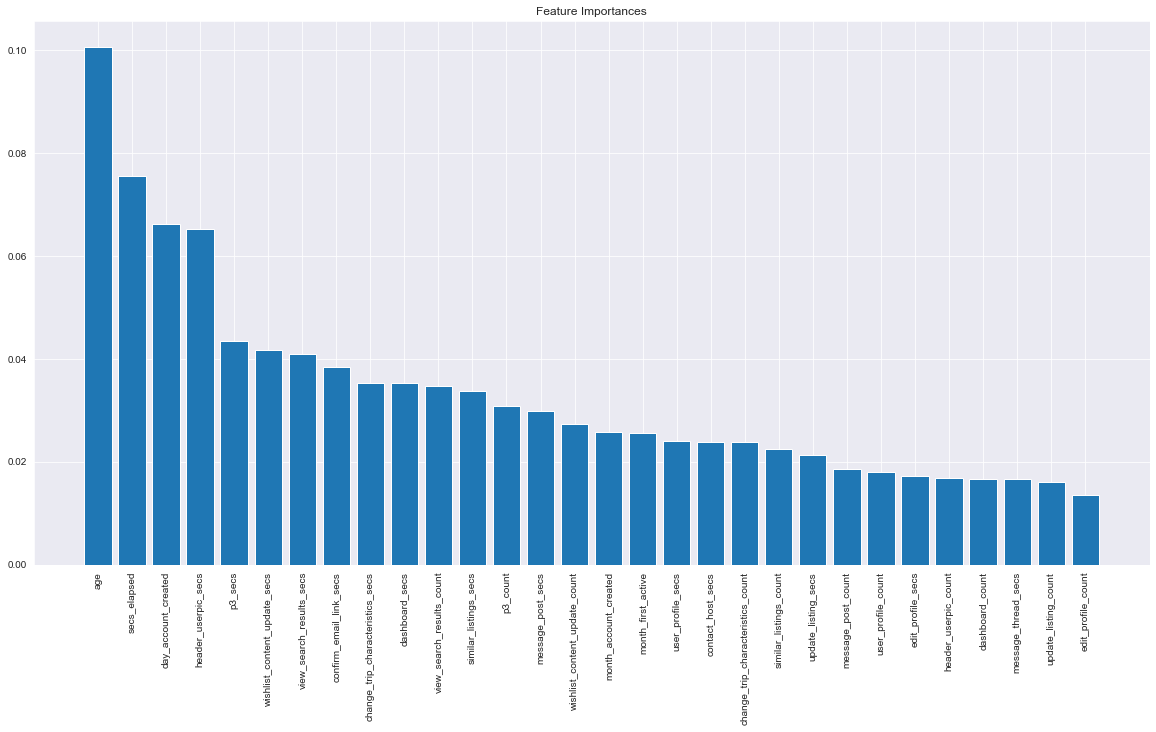

CPU times: user 563 ms, sys: 20.3 ms, total: 583 ms
Wall time: 592 ms


In [77]:
%%time

## Display Most Important Features

importance = rfc.feature_importances_

top_features = pd.DataFrame(importance, x_train.columns).sort_values(by=0, ascending=False)
top_features_to_plot = top_features.iloc[:70,:]


plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.bar(list(top_features_to_plot.index), list(top_features_to_plot[0]))
plt.xticks(rotation=90)
plt.show()

The above graph displays factors that contributed the most to the highly accurate predictions of booking destination. The age and the amount of time spent on the platform were the most useful factors in determining where a person was likely to book their next stay.

## Generating Predictions Current Users Booking Destinations

In [78]:
%%time

df_predictions = df_predict[x_test.columns]

## Remove High Feature Corner Node Observations

for i in df_predictions.columns:
    df_predictions = df_predictions.loc[df[i] <= 1]
    
## Generate Predictions

ndf_predictions = rfc.predict(df_predictions)

CPU times: user 1.11 s, sys: 52.6 ms, total: 1.16 s
Wall time: 1.17 s


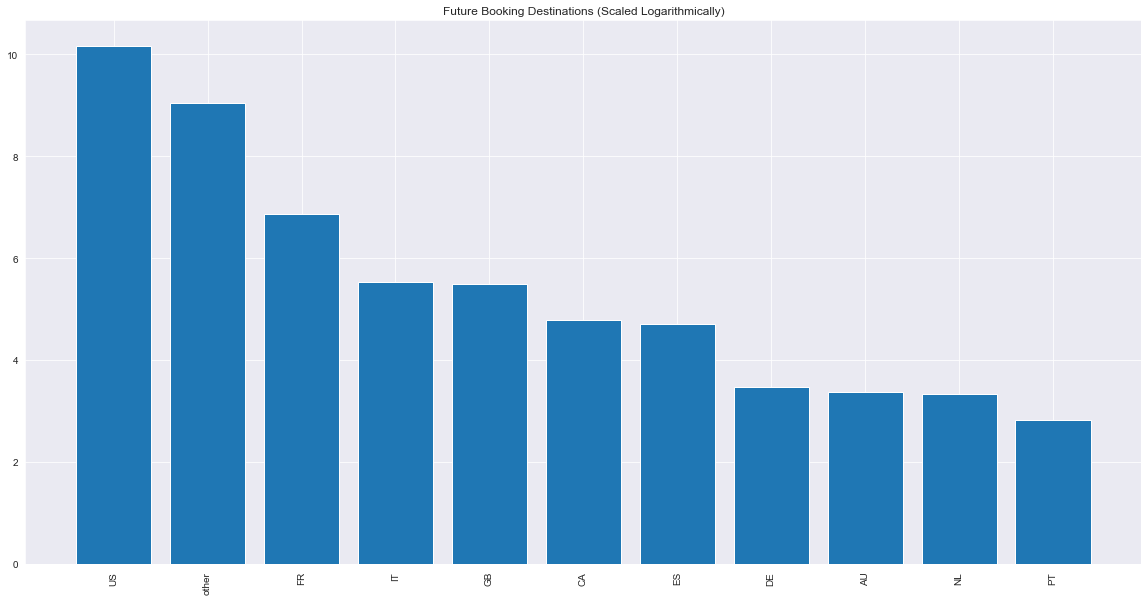

In [80]:
plt.figure(figsize=(20,10))
plt.title('Future Booking Destinations (Scaled Logarithmically)')
plt.bar(list(pd.Series(ndf_predictions).value_counts().index), 
        list(pd.Series(ndf_predictions).value_counts().apply(math.log)))
plt.xticks(rotation=90)
plt.show()

By using the most successful modeling type on the data of the users that haven't booked housing with the platform, future usage of the Airbnb platform can be predicted and analyzed. The distribution of the plot above shows that France is the most likely destination for non-US Airbnb users.

## Analysis and Conclusion


The random forest model using features chosen based on random forest feature importances was the best model when it came to predicting the first booking destinations, making it the strongest base for a classifier that can scaled for production. 
It was able to predict the booking destination of users with a 97% accuracy.
While other model types had potential to produce more accurate predictions, they had much higher runtimes, making them unfit to run larger amounts of data. By introducing more data to this modeling pipeline, it can be trained to yield even more accurate and consistent results.

This classifier created by pairing the best supervised modeling technique and feature reduction method was built to be both accurate and scalable. Potential improvements in this product includes adding more features and further tuning of the model type. The accuracy of this model will most likely increase as it is trained with more data as well.

Understanding how to better utilize supervised modeling techniques to predict booking destination, will give insight as to how people are using the Airbnb platform and particular habits different types of customers share.
This can allow for more direct marketing to specific types of users or changes in the product that better match how the service is used. Through the use of cheap and accessible data, decisions can be made that can result in increased efficiency and revenue for the company.

